In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

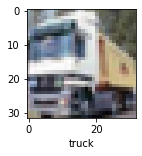

In [8]:
plot_sample(x_train,y_train,1)

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

In [10]:
ann=models.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [11]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 197s 125ms/step - loss: 1.8129 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 195s 125ms/step - loss: 1.6241 - accuracy: 0.4294
Epoch 3/5
1563/1563 [==============================] - 202s 129ms/step - loss: 1.5403 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 192s 123ms/step - loss: 1.4817 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 195s 125ms/step - loss: 1.4335 - accuracy: 0.4953


In [12]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 17s 51ms/step - loss: 1.4657 - accuracy: 0.4817


[1.4657349586486816, 0.48170000314712524]

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.48      0.62      0.55      1000
           1       0.74      0.47      0.57      1000
           2       0.36      0.39      0.37      1000
           3       0.33      0.44      0.38      1000
           4       0.50      0.28      0.36      1000
           5       0.50      0.22      0.30      1000
           6       0.39      0.75      0.52      1000
           7       0.66      0.46      0.54      1000
           8       0.59      0.62      0.60      1000
           9       0.56      0.57      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



### CNN

In [1]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

NameError: name 'models' is not defined

In [15]:

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 122s 76ms/step - loss: 1.4628 - accuracy: 0.4763
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.1026 - accuracy: 0.6152s - loss: 1.1024 - accuracy: 0.61 - ETA: 0s - loss: 1
Epoch 3/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9741 - accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8894 - accuracy: 0.6896
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8264 - accuracy: 0.7128
Epoch 6/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.7702 - accuracy: 0.7329
Epoch 7/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.7171 - accuracy: 0.7513
Epoch 8/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.6768 - accuracy: 0.7624
Epoch 9/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.6366 - accuracy: 0.7774
Epoch 10/

In [23]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.9303 - accuracy: 0.6949


[0.9303463101387024, 0.6948999762535095]

In [24]:
y_test=y_test.reshape(-1,)

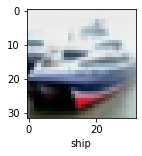

In [25]:
plot_sample(x_test,y_test,1)

In [26]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[2.3906713e-03, 1.3674982e-04, 7.3098851e-04, 5.9916854e-01,
        4.8305254e-04, 8.3329730e-02, 3.9830427e-03, 8.6893298e-05,
        3.0952227e-01, 1.6805250e-04],
       [3.7655831e-05, 4.8810500e-03, 5.0064686e-09, 1.8578125e-09,
        2.6771321e-10, 1.0163553e-10, 1.9533376e-10, 1.0291673e-11,
        9.9508011e-01, 1.1653506e-06],
       [4.1441150e-02, 5.2345961e-02, 9.5128278e-05, 2.4322304e-03,
        5.5897731e-04, 1.2211614e-04, 8.5494241e-05, 5.7617994e-04,
        8.9572519e-01, 6.6175344e-03],
       [9.4006729e-01, 1.2350318e-03, 3.0211288e-02, 1.9584445e-04,
        1.2955297e-03, 2.9725641e-06, 1.2494998e-05, 8.0434093e-06,
        2.6970739e-02, 6.8276319e-07],
       [9.6297555e-08, 1.1401387e-06, 3.7872226e-03, 8.5940808e-03,
        7.5148660e-01, 7.9820812e-04, 2.3532373e-01, 5.6734775e-06,
        3.1898921e-06, 1.2902294e-07]], dtype=float32)

In [27]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

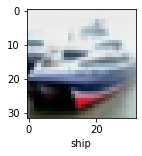

In [45]:
plot_sample(x_test,y_test,1)

In [46]:
classes[y_classes[1]]

'ship'

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=cnn.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.76      0.86      0.81      1000
           2       0.56      0.62      0.59      1000
           3       0.57      0.45      0.50      1000
           4       0.67      0.60      0.63      1000
           5       0.63      0.54      0.59      1000
           6       0.72      0.80      0.76      1000
           7       0.70      0.78      0.74      1000
           8       0.83      0.78      0.80      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

